In [92]:
# importing the modules
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split

# importing the data
train = pd.read_csv('C:/Users/Big-Max/Desktop/BIG-MAX/BOOKS\Machine Learning/DATA SCIENCE/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('C:/Users/Big-Max/Desktop/BIG-MAX/BOOKS\Machine Learning/DATA SCIENCE/house-prices-advanced-regression-techniques/test.csv')
sub = pd.read_csv('C:/Users/Big-Max/Desktop/BIG-MAX/BOOKS\Machine Learning/DATA SCIENCE/house-prices-advanced-regression-techniques/sample_submission.csv')

In [53]:
# filling the missing values in both the train and test with 0
x = train.fillna(0)
y = test.fillna(0)

# we display a summary of the data
train.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
# we show a correlation between data
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


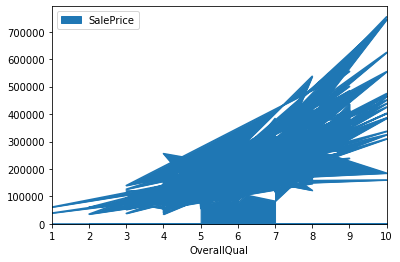

In [297]:
df = x.loc[:,['OverallQual','OverallCond','YearBuilt','SalePrice']]
df.plot.area(x = 'OverallQual', y = 'SalePrice')

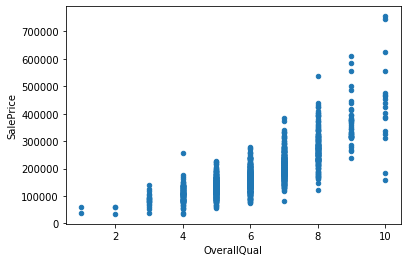

In [44]:
# a scatter plot of relationship between OverallQual and SalePrice
df.plot.scatter(x = 'OverallQual', y = 'SalePrice')

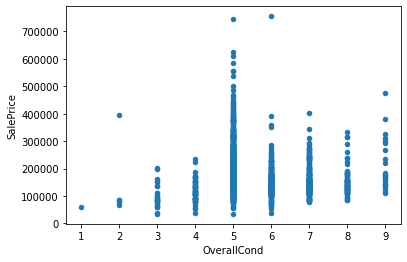

In [305]:
# relationship between overall condition and price
df.plot.scatter(x = 'OverallCond', y = 'SalePrice')

In [74]:
x_2 = train.loc[:,['Id','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF ','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvG','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']]
x_3 = x_2.fillna(0)

In [120]:
xx = x_3.drop(['SalePrice'], axis = 1)
yy = np.ravel(x_3['SalePrice'])

In [190]:
# splitting the data
x_train,x_test,y_train,y_test = train_test_split(xx, yy, test_size= 0.4, random_state =42)

In [191]:
############################### training the model with SUPPORT VECTOR MACHINE ####################################
from sklearn.svm import SVR

model = SVR(kernel = 'linear')

model.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [192]:
# predicting the sales
pred = model.predict(x_test)
pred = pd.DataFrame(pred, columns=['Predicted_sales'])

In [193]:
# measuring the model MSE
from sklearn.metrics import r2_score,mean_squared_error

mse = mean_squared_error(y_test, pred)
mse

1544261747.2100563

In [194]:
# RMSE
rmse = np.sqrt(mse)
rmse

39297.09591318494

In [216]:
# SELECTING THE COLUMN ID
Id = x_3['Id']
Id = Id.dropna()
Id = pd.DataFrame(Id)

In [220]:
# JOINING THE COLUMNS
result = pd.concat([Id, pred], axis = 1)

In [221]:
# PREDICTING THE RESULTS
result = result.dropna()
result

,Id,Predicted_sales
0,1,144765.048835
1,2,297365.796896
2,3,98037.911681
3,4,150253.740552
4,5,258079.166693
5,6,63265.422468
6,7,200563.824123
7,8,143493.424258
8,9,59713.425970
9,10,142590.724021


In [233]:
# TESTING WITH NEW DATA
new = xx.groupby('Id')
a = new.get_group(1460)

In [237]:
# PREDICTING
z = model.predict(a)
z = pd.DataFrame(z)
z

,0
0,155143.060409


In [232]:
a

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1459,1460,20,75.0,9937,5,6,1965,1965,0.0,830,...,736,68,0,0,0,0,0,6,2008,147500


In [279]:
##################################### new model GAUSSIAN ##############################################
from sklearn.naive_bayes import GaussianNB
model_2 = GaussianNB()

In [289]:
# model training
model_2.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [290]:
# model predicting
G_pred = model_2.predict(x_test)
G_pred = pd.DataFrame(G_pred, columns=['Predicted_sales'])

In [291]:
from sklearn.metrics import r2_score,mean_squared_error
G_test = mean_squared_error(y_test,pred)

In [292]:
G_test

1544261747.2100563

In [293]:
G_test_sq = np.sqrt(G_test)
G_test_sq

39297.09591318494

In [294]:
resul_2 = pd.concat([Id, G_pred], axis = 1)
result_2 = resul_2.dropna()
result_2

,Id,Predicted_sales
0,1,152000.0
1,2,320000.0
2,3,87000.0
3,4,177000.0
4,5,280000.0
5,6,141000.0
6,7,177000.0
7,8,148500.0
8,9,141000.0
9,10,112000.0


In [295]:
########################## LINEAR REGRESSION#####################################################
from sklearn.linear_model import LinearRegression
model_3 = LinearRegression(normalize=True)

In [254]:
model_3.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [272]:
LR_pred = model_3.predict(x_test)
LR_pred = pd.DataFrame(LR_pred, columns=['Predicted_sales'])

In [273]:
from sklearn.metrics import r2_score,mean_squared_error
LR_mse = mean_squared_error(y_test,LR_pred)
LR_mse

1481695805.7459166

In [274]:
LR_rmse = np.sqrt(LR_mse)
LR_rmse

38492.801999151954

In [275]:
resul_3 = pd.concat([Id,LR_pred], axis = 1)
result_3 =resul_3.dropna() 
result_3

,Id,Predicted_sales
0,1,148385.380974
1,2,300850.368034
2,3,120307.089787
3,4,179763.339894
4,5,302544.949968
5,6,61875.054837
6,7,238720.313133
7,8,145782.804375
8,9,60506.388661
9,10,152622.513285
